<a href="https://colab.research.google.com/github/ShifaShahaniD/sentiment-analysis-in-amazon-product-reviews-using-BiGRU/blob/main/Sentiment_analysis_BiGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Download dataset in csv format and upload to runtime

In [ ]:
import tensorflow
import pandas as pd
df = pd.read_csv("/content/review (1).csv")
df.head()

,Summary,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Score
0,Good Quality Dog Food,NaN,NaN,NaN,NaN,NaN,5
1,Not as Advertised,NaN,NaN,NaN,NaN,NaN,1
2,"""Delight"" says it all",NaN,NaN,NaN,NaN,NaN,4
3,Cough Medicine,NaN,NaN,NaN,NaN,NaN,2
4,Great taffy,NaN,NaN,NaN,NaN,NaN,5


###Extract the fields that contains review *summary* and ratings(score)

In [ ]:
review_df = df[['Summary','Score']]

print(review_df.shape)
review_df.head(5)

(5999, 2)


,Summary,Score
0,Good Quality Dog Food,5
1,Not as Advertised,1
2,"""Delight"" says it all",4
3,Cough Medicine,2
4,Great taffy,5


In [ ]:
review_df.columns

Index(['Summary', 'Score'], dtype='object')

In [ ]:
review_df["Score"].value_counts()

5    3837
4     811
1     557
3     457
2     337
Name: Score, dtype: int64

In [ ]:
df["Sentiment"] = df["Score"].apply(lambda score: "positive" if score >= 3 else "negative")
df['Sentiment'] = df['Sentiment'].map({'positive':'Positive', 'negative':'Negative'})
#df['short_review'] =df['data/review_body'].str.decode("utf-8")
df = df[["Summary", "Sentiment"]]

In [ ]:
df

,Summary,Sentiment
0,Good Quality Dog Food,Positive
1,Not as Advertised,Negative
2,"""Delight"" says it all",Positive
3,Cough Medicine,Negative
4,Great taffy,Positive
...,...,...
5994,«:::D:::» «:::E:::» «:::L:::» «:::I:::» «:::C:...,Positive
5995,This is not that great,Negative
5996,"The ""paws down"" favorite among canned food!",Positive
5997,Worked great for my cat,Positive


In [ ]:
rev = review_df.Summary.values

In [ ]:
df["Sentiment"].value_counts()

Positive    5105
Negative     894
Name: Sentiment, dtype: int64

In [ ]:
sentiment_label = df.Sentiment.factorize()
sentiment_label

(array([0, 1, 0, ..., 0, 0, 0]),
 Index(['Positive', 'Negative'], dtype='object'))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(rev)

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(rev)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences  
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Flatten,Dense, Dropout, SpatialDropout1D, Bidirectional
from tensorflow.keras.layers import Embedding

In [ ]:
vocab_size = 13234
embedding_vector_length = 40
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(Bidirectional(GRU(200)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 40)           529360    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 40)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 400)              290400    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 820,161
Trainable params: 820,161
Non-trai

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
150/150 [==============================] - 101s 646ms/step - loss: 0.4088 - accuracy: 0.8454 - val_loss: 0.3269 - val_accuracy: 0.8683
Epoch 2/10
150/150 [==============================] - 97s 647ms/step - loss: 0.2494 - accuracy: 0.8960 - val_loss: 0.2969 - val_accuracy: 0.8892
Epoch 3/10
150/150 [==============================] - 97s 648ms/step - loss: 0.2451 - accuracy: 0.9131 - val_loss: 0.3024 - val_accuracy: 0.8825
Epoch 4/10
150/150 [==============================] - 97s 644ms/step - loss: 0.1474 - accuracy: 0.9444 - val_loss: 0.3280 - val_accuracy: 0.8758
Epoch 5/10
150/150 [==============================] - 97s 649ms/step - loss: 0.1145 - accuracy: 0.9564 - val_loss: 0.3580 - val_accuracy: 0.8692
Epoch 6/10
150/150 [==============================] - 97s 648ms/step - loss: 0.0960 - accuracy: 0.9646 - val_loss: 0.3787 - val_accuracy: 0.8758
Epoch 7/10
150/150 [==============================] - 97s 646ms/step - loss: 0.0861 - accuracy: 0.9692 - val_loss: 0.4185 - val_a

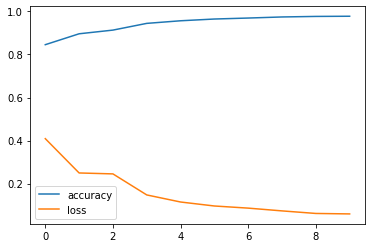

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ",sentiment_label[1][prediction])

In [ ]:
test_sentence1 = "average"
predict_sentiment(test_sentence1)

Predicted label:  Negative


In [ ]:
test_sentence2 = "best"
predict_sentiment(test_sentence2)

Predicted label:  Positive


In [ ]:
test_sentence3 = "not upto the mark"
predict_sentiment(test_sentence3)

Predicted label:  Negative


In [ ]:
test_sentence4 = "highly recommended"
predict_sentiment(test_sentence4)

Predicted label:  Positive


In [ ]:
test_sentence5 = "waste of money"
predict_sentiment(test_sentence5)

Predicted label:  Negative
